### Question 1

In [2]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()

Xtrain, Xtest, yTrain, yTest =\
train_test_split(wine.data, wine.target,\
                 train_size=0.7, test_size=0.3, random_state=42)

clf = DTC()
clf.fit(Xtrain, yTrain)

print("Train score: {:.2f}".format(clf.score(Xtrain, yTrain)))
print("Test score: {:.2f}".format(clf.score(Xtest, yTest)))
print("Depth: {}".format(clf.tree_.max_depth) )
print("Most important feature is", wine.feature_names[clf.feature_importances_.argmax(axis=0)])


Train score: 1.00
Test score: 0.96
Depth: 4
Most important feature is flavanoids


In [3]:
clf = DTC(criterion='gini')
clf.fit(Xtrain, yTrain)

print("Train score: {:.2f}".format(clf.score(Xtrain, yTrain)))
print("Test score: {:.2f}".format(clf.score(Xtest, yTest)))
print("Depth: {}".format(clf.tree_.max_depth) )
print("Most important feature is", wine.feature_names[clf.feature_importances_.argmax(axis=0)])


Train score: 1.00
Test score: 0.96
Depth: 4
Most important feature is flavanoids


In [4]:
for i in range(3, 7):
    clf = DTC(criterion='entropy', min_samples_split=i)
    clf.fit(Xtrain, yTrain)
    print("min split", i, "test score: {:.2f}".format(clf.score(Xtest, yTest)))

min split 3 test score: 0.87
min split 4 test score: 0.83
min split 5 test score: 0.85
min split 6 test score: 0.85


### Question 2

In [5]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

Gradient boosting is an additive ensemble method therefore it is sequential

In [6]:
clf = GBC(max_depth=4, learning_rate=0.5, n_estimators=100)
clf.fit(Xtrain, yTrain)
print("GBC train score: {:.2}".format(clf.score(Xtrain, yTrain)))
print("GBC test score: {:.2}".format(clf.score(Xtest, yTest)))

GBC train score: 1.0
GBC test score: 0.94


No there is no improvement

In [7]:
clf = GBC(max_depth=4, learning_rate=0.5, n_estimators=200)
clf.fit(Xtrain, yTrain)
print("GBC train score: {:.2}".format(clf.score(Xtrain, yTrain)))
print("GBC test score: {:.2}".format(clf.score(Xtest, yTest)))

GBC train score: 1.0
GBC test score: 0.94


In [8]:
for i in range(2, len(wine.feature_names)+1):
    clf = GBC(max_features=i, learning_rate=0.5, n_estimators=100)
    clf.fit(Xtrain, yTrain)
    print("GBC test score: {:.4}".format(clf.score(Xtest, yTest)))

GBC test score: 1.0
GBC test score: 0.9815
GBC test score: 1.0
GBC test score: 1.0
GBC test score: 0.963
GBC test score: 1.0
GBC test score: 1.0
GBC test score: 0.963
GBC test score: 0.963
GBC test score: 0.963
GBC test score: 0.963
GBC test score: 0.963


### Question 3

(178, 2)
0.83064516129
0.796296296296


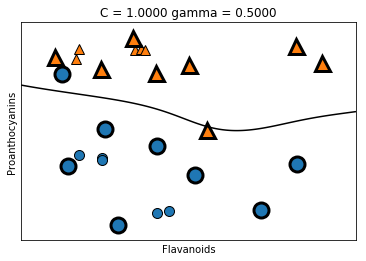

0.78
0.74


In [16]:
import numpy as np
import mglearn 
from sklearn.svm import SVC
import matplotlib.pyplot as plt

fpos = 0
ppos = 0
for i,e in enumerate(wine.feature_names):
    if e == "flavanoids": fpos = i
    elif e == "proanthocyanins": ppos = i
    
X = np.transpose(np.vstack((wine.data[:,fpos],wine.data[:,ppos])))
Xtrain, Xtest, yTrain, yTest = train_test_split(X, wine.target,\
                 train_size=0.7, test_size=0.3, random_state=42)

svm = SVC(kernel='rbf')
svm.fit(Xtrain, yTrain)
print(X.shape)
print(svm.score(Xtrain, yTrain))
print(svm.score(Xtest, yTest))

from math import log10
mglearn.plots.plot_svm(log_C=0, log_gamma=log10(1/2)) 

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
plt.xlabel("Flavanoids")
plt.ylabel("Proanthocyanins")
plt.show()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)
svm.fit(Xtrain_scaled, yTrain)
print("{:.2f}".format(svm.score(Xtrain_scaled, yTrain)))
print("{:.2f}".format(svm.score(Xtest_scaled, yTest)))

